# 线性回归

原理啥的不再赘述，都是经典常识。


本节参考:
- https://github.com/ShusenTang/Dive-into-DL-PyTorch/blob/master/code/chapter03_DL-basics/3.3_linear-regression-pytorch.ipynb


In [13]:
import numpy as np
import torch
import torch.optim as optim
from torch import nn
import torch.utils.data as Data
from matplotlib import pyplot as plt

print(torch.__version__)
torch.manual_seed(1)
torch.set_default_tensor_type('torch.FloatTensor')

1.13.1+cpu


In [41]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# 定义一些数据用于进行线性回归
x = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(x, np.array([1, 2])) + 3

# 创建线性回归模型并拟合数据
model = LinearRegression().fit(x, y)
# 预测新数据
x_new = np.array([[3, 5]])
y_new = model.predict(x_new)
print(y_new)

In [ ]:
# 创建一个三维图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制数据点
ax.scatter(x[:,0], x[:,1], y)

# 绘制线性回归平面
xx, yy = np.meshgrid(range(3), range(6))
zz = np.array([model.predict(np.array([[i, j]]))[0] for i, j in zip(xx, yy)])
ax.plot_surface(xx, yy, zz, alpha=0.5)

# 显示图像
plt.show()

In [ ]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.5, size=labels.size()), dtype=torch.float)

In [6]:
batch_size = 10

# 将训练数据的特征和标签组合
dataset = Data.TensorDataset(features, labels)

# 把 dataset 放入 DataLoader
data_iter = Data.DataLoader(
    dataset=dataset,  # torch TensorDataset format
    batch_size=batch_size,  # mini batch size
    shuffle=True,  # 要不要打乱数据 (打乱比较好)
    num_workers=2,  # 多线程来读数据
)

## 1)原始模型

In [29]:
learning_rate = 0.001

# 初始化参数
w = torch.rand([2, 1], requires_grad=True)
b = torch.tensor(0, requires_grad=True, dtype=torch.float32)
y_true = torch.reshape(labels, (num_examples, 1))
# 4. 通过循环，反向传播，更新参数
for i in range(800):
    # 3. 计算loss
    print(features.shape)
    print(w.shape)
    y_pred = torch.matmul(features, w) + b
    print(y_pred.shape)
    print(y_true.shape)
    loss = (y_pred - y_true).pow(2).mean()

    if w.grad is not None:
        w.grad.data.zero_()
    if b.grad is not None:
        b.grad.data.zero_()

    loss.backward()  # 反向传播
    w.data = w.data - learning_rate*w.grad.data
    b.data = b.data - learning_rate*b.grad.data
    if i % 50 == 0:
        print("loss:", loss.item())

torch.Size([1000, 2])
torch.Size([2, 1])
torch.Size([1000, 1])
torch.Size([1000, 1])
loss: 38.23929214477539
torch.Size([1000, 2])
torch.Size([2, 1])
torch.Size([1000, 1])
torch.Size([1000, 1])
torch.Size([1000, 2])
torch.Size([2, 1])
torch.Size([1000, 1])
torch.Size([1000, 1])
torch.Size([1000, 2])
torch.Size([2, 1])
torch.Size([1000, 1])
torch.Size([1000, 1])
torch.Size([1000, 2])
torch.Size([2, 1])
torch.Size([1000, 1])
torch.Size([1000, 1])
torch.Size([1000, 2])
torch.Size([2, 1])
torch.Size([1000, 1])
torch.Size([1000, 1])
torch.Size([1000, 2])
torch.Size([2, 1])
torch.Size([1000, 1])
torch.Size([1000, 1])
torch.Size([1000, 2])
torch.Size([2, 1])
torch.Size([1000, 1])
torch.Size([1000, 1])
torch.Size([1000, 2])
torch.Size([2, 1])
torch.Size([1000, 1])
torch.Size([1000, 1])
torch.Size([1000, 2])
torch.Size([2, 1])
torch.Size([1000, 1])
torch.Size([1000, 1])
torch.Size([1000, 2])
torch.Size([2, 1])
torch.Size([1000, 1])
torch.Size([1000, 1])
torch.Size([1000, 2])
torch.Size([2, 1])


ValueError: x and y must be the same size

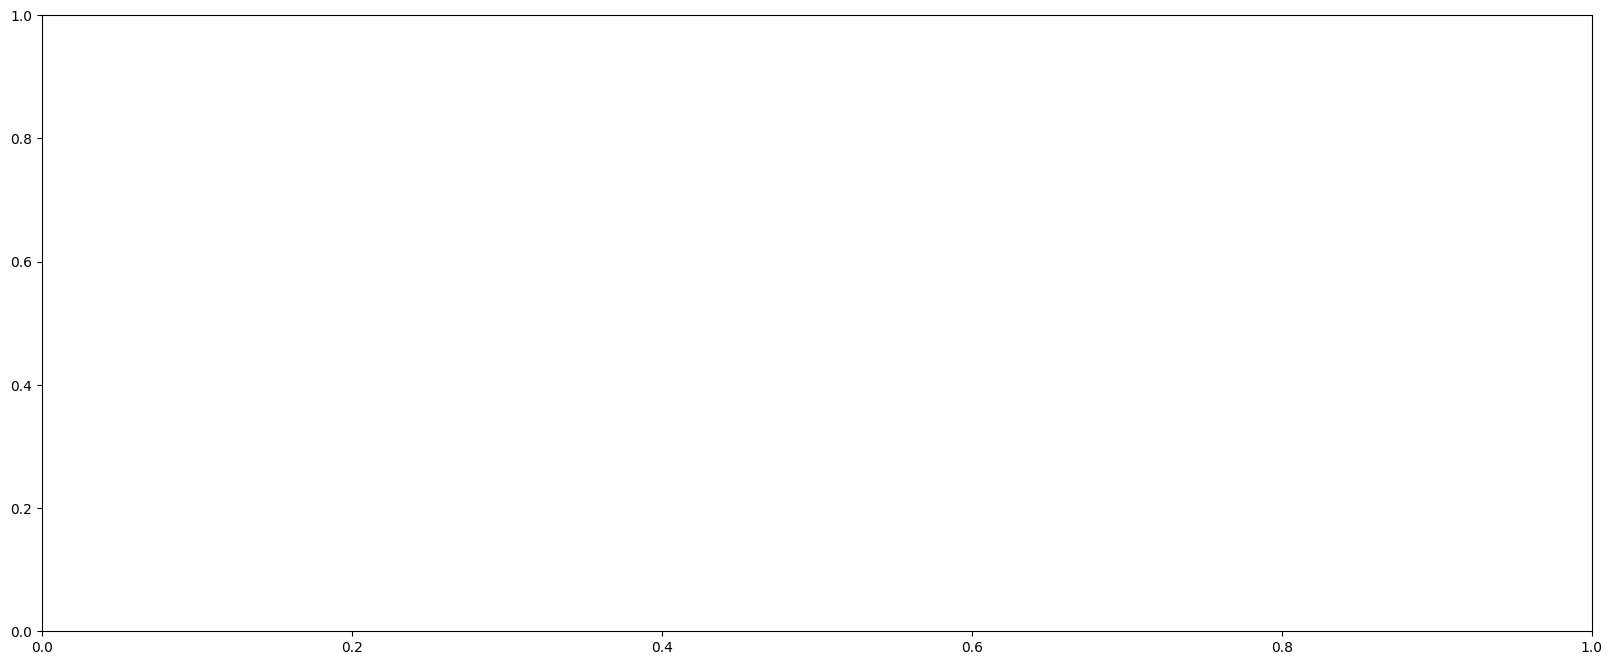

In [32]:
fig = plt.figure(figsize=(20, 8))
ax = fig.gca(projection="3d")

y_pred = torch.matmul(features, w) + b
plt.scatter(features.numpy().reshape(-1), labels.numpy().reshape(-1), c='r')
plt.plot(features.numpy().reshape(-1), y_pred.detach().numpy().reshape(-1))
plt.show()

In [7]:
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_feature, 1)

    def forward(self, x):
        y = self.linear(x)
        return y


net = LinearNet(num_inputs)
print(net)  # 使用print可以打印出网络的结构

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [8]:
loss = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.03)

In [10]:
num_epochs = 100
for epoch in range(1, num_epochs + 1):
    cost = None
    for X, _y in data_iter:
        output = net(X)
        l = loss(output, _y.view(-1, 1))
        optimizer.zero_grad()  # 梯度清零，等价于net.zero_grad()
        l.backward()
        optimizer.step()
        cost = l
    print('epoch %d, loss: %f' % (epoch, cost.item()))

epoch 1, loss: 0.000113
epoch 2, loss: 0.000115
epoch 3, loss: 0.000084
epoch 4, loss: 0.000127
epoch 5, loss: 0.000136
epoch 6, loss: 0.000193
epoch 7, loss: 0.000078
epoch 8, loss: 0.000046
epoch 9, loss: 0.000084
epoch 10, loss: 0.000075
epoch 11, loss: 0.000144
epoch 12, loss: 0.000063
epoch 13, loss: 0.000056
epoch 14, loss: 0.000066
epoch 15, loss: 0.000115
epoch 16, loss: 0.000171
epoch 17, loss: 0.000185
epoch 18, loss: 0.000086
epoch 19, loss: 0.000103
epoch 20, loss: 0.000082
epoch 21, loss: 0.000129
epoch 22, loss: 0.000150
epoch 23, loss: 0.000030
epoch 24, loss: 0.000081
epoch 25, loss: 0.000126
epoch 26, loss: 0.000139
epoch 27, loss: 0.000082
epoch 28, loss: 0.000037
epoch 29, loss: 0.000134
epoch 30, loss: 0.000102
epoch 31, loss: 0.000077
epoch 32, loss: 0.000138
epoch 33, loss: 0.000065
epoch 34, loss: 0.000173
epoch 35, loss: 0.000050
epoch 36, loss: 0.000039
epoch 37, loss: 0.000112
epoch 38, loss: 0.000090
epoch 39, loss: 0.000048
epoch 40, loss: 0.000063
epoch 41,

In [12]:
prediction = [torch.argmax(net(X)) for X, _y in data_iter]
prediction

[tensor(7),
 tensor(7),
 tensor(7),
 tensor(8),
 tensor(4),
 tensor(6),
 tensor(5),
 tensor(9),
 tensor(3),
 tensor(3),
 tensor(3),
 tensor(5),
 tensor(0),
 tensor(4),
 tensor(3),
 tensor(5),
 tensor(8),
 tensor(0),
 tensor(3),
 tensor(7),
 tensor(4),
 tensor(5),
 tensor(3),
 tensor(8),
 tensor(6),
 tensor(7),
 tensor(2),
 tensor(0),
 tensor(0),
 tensor(7),
 tensor(5),
 tensor(1),
 tensor(5),
 tensor(2),
 tensor(4),
 tensor(1),
 tensor(4),
 tensor(0),
 tensor(4),
 tensor(4),
 tensor(5),
 tensor(1),
 tensor(9),
 tensor(6),
 tensor(2),
 tensor(5),
 tensor(7),
 tensor(4),
 tensor(1),
 tensor(9),
 tensor(8),
 tensor(4),
 tensor(3),
 tensor(3),
 tensor(7),
 tensor(4),
 tensor(1),
 tensor(7),
 tensor(7),
 tensor(5),
 tensor(5),
 tensor(4),
 tensor(6),
 tensor(3),
 tensor(6),
 tensor(3),
 tensor(8),
 tensor(0),
 tensor(5),
 tensor(6),
 tensor(2),
 tensor(0),
 tensor(1),
 tensor(1),
 tensor(9),
 tensor(3),
 tensor(1),
 tensor(3),
 tensor(9),
 tensor(2),
 tensor(3),
 tensor(2),
 tensor(7),
 ten

Epoch [100/1000], Loss: 7.5279
Epoch [200/1000], Loss: 6.2591
Epoch [300/1000], Loss: 5.3784
Epoch [400/1000], Loss: 4.7636
Epoch [500/1000], Loss: 4.3318
Epoch [600/1000], Loss: 4.0270
Epoch [700/1000], Loss: 3.8105
Epoch [800/1000], Loss: 3.6560
Epoch [900/1000], Loss: 3.5452
Epoch [1000/1000], Loss: 3.4654
Predicted value of y for x = [3, 5]: 10.016683578491211
(6, 3)
(6, 3)
[(array([0, 1, 2]), array([0, 0, 0])), (array([0, 1, 2]), array([1, 1, 1])), (array([0, 1, 2]), array([2, 2, 2])), (array([0, 1, 2]), array([3, 3, 3])), (array([0, 1, 2]), array([4, 4, 4])), (array([0, 1, 2]), array([5, 5, 5]))]


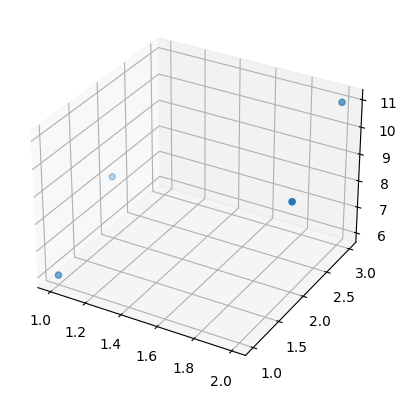

In [40]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义一些数据用于进行线性回归
x_train = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y_train = np.dot(x_train, np.array([1, 2])) + 3

# 转换为Tensor
x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

# 定义线性回归模型
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression(2, 1)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 训练模型
num_epochs = 1000
for epoch in range(num_epochs):
    # 前向传播
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 每100次迭代输出一次结果
    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# 预测新数据
x_new_tensor = torch.Tensor([[3, 5]])
y_new_tensor = model(x_new_tensor)
y_new = y_new_tensor.item()
print('Predicted value of y for x = [3, 5]:', y_new)

# 创建一个三维图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制数据点
ax.scatter(x_train[:,0], x_train[:,1], y_train)

# 绘制线性回归平面
xx, yy = np.meshgrid(range(3), range(6))
print(xx.shape)
print(yy.shape)
print([(i, j) for i, j in zip(xx, yy)])
# zz = np.array([model(torch.Tensor([[i, j]])).item() for i, j in zip(xx, yy)])
# print(zz.shape)
# ax.plot_surface(xx, yy, zz, alpha=0.5)

# 显示图像
# plt.show()